In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns


In [3]:
df=pd.read_csv('Sales Data.csv')

In [5]:
df.head()

,Unnamed: 0,Order ID,Product Category,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Time of Day
0,0,295665,Laptops and Computers,Macbook Pro Laptop,1,1700.00,30-12-2019 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,Night
1,1,295666,Home Appliances,LG Washing Machine,1,600.00,29-12-2019 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,Morning
2,2,295667,Charging Cables,USB-C Charging Cable,1,11.95,12-12-2019 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,Evening
3,3,295668,Monitors,27in FHD Monitor,1,149.99,22-12-2019 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,Afternoon
4,4,295669,Charging Cables,USB-C Charging Cable,1,11.95,18-12-2019 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,Afternoon


In [12]:
df.shape

(185950, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product Category  185950 non-null  object 
 3   Product           185950 non-null  object 
 4   Quantity Ordered  185950 non-null  int64  
 5   Price Each        185950 non-null  float64
 6   Order Date        185950 non-null  object 
 7   Purchase Address  185950 non-null  object 
 8   Month             185950 non-null  int64  
 9   Sales             185950 non-null  float64
 10  City              185950 non-null  object 
 11  Hour              185950 non-null  int64  
 12  Time of Day       185950 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 18.4+ MB


In [7]:
df.isnull().sum().sort_values()

Unnamed: 0          0
Order ID            0
Product Category    0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
Time of Day         0
dtype: int64

In [8]:
df = df.drop(columns=['Unnamed: 0', 'Order ID', 'Order Date', 'Purchase Address'])

In [41]:
#corr_metrics = df.corr()
#corr_metrics.style.background_gradient()

In [14]:
df= pd.get_dummies(df, columns=['Product Category', 'Product', 'City', 'Time of Day'])

In [25]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [26]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)


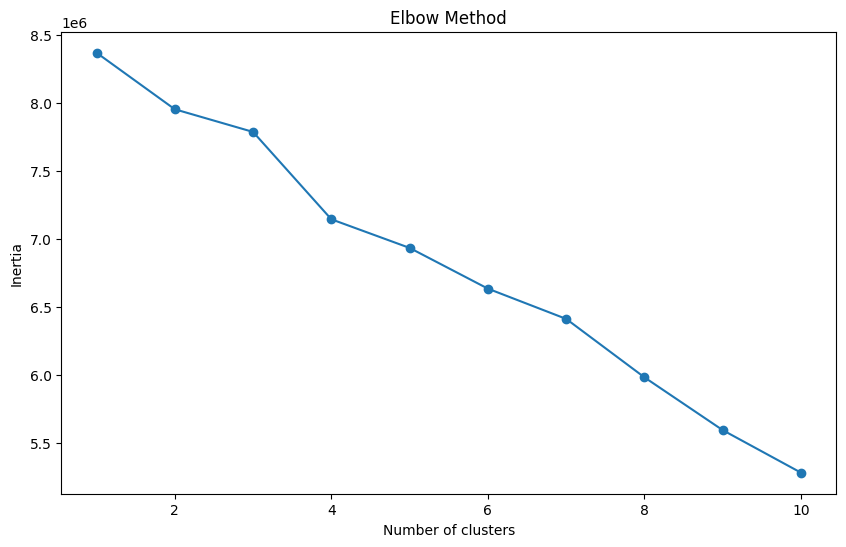

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [30]:
pca=PCA()

In [31]:
pca.fit(scaled_df)

PCA()

In [38]:
exp_variance = pca.explained_variance_ratio_

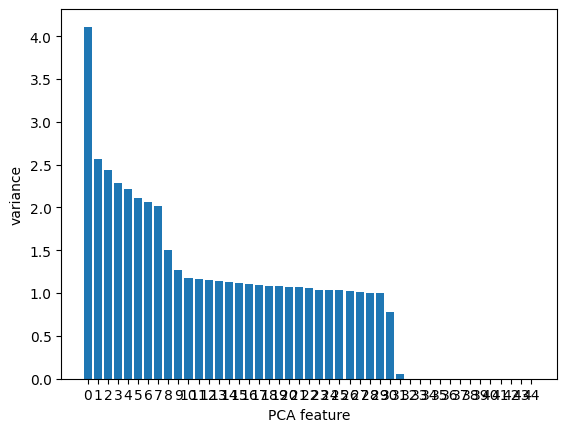

In [32]:
features =range(pca.n_components_)
plt.bar(features,pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

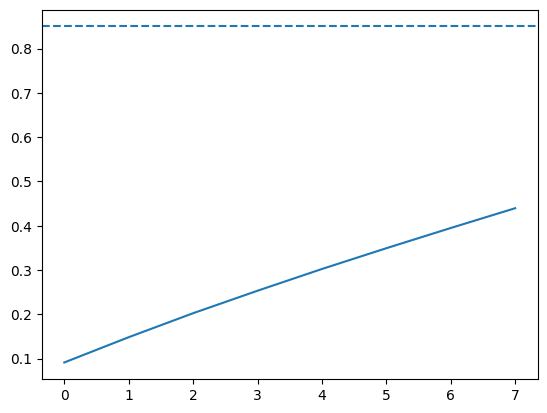

In [39]:
cum_exp_variance = np.cumsum(exp_variance)

fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.85, linestyle='--')

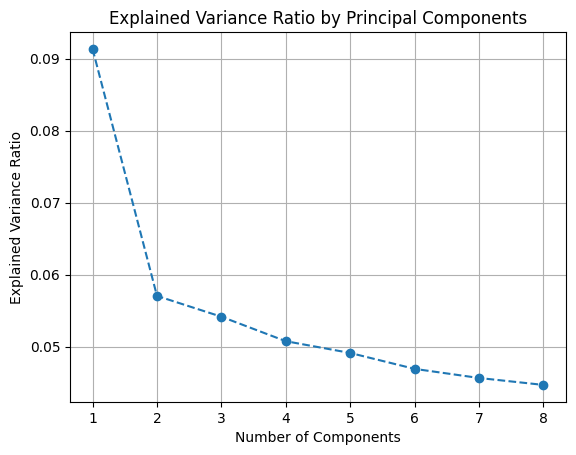

In [40]:
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.xticks(range(1, pca.n_components_ + 1))
plt.grid(True)
plt.show()

In [47]:
pca=PCA(n_components=2,random_state=42)
pca.fit(scaled_df)
pca_features =pca.transform(scaled_df)

In [49]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_features)
    inertia.append(kmeans.inertia_)


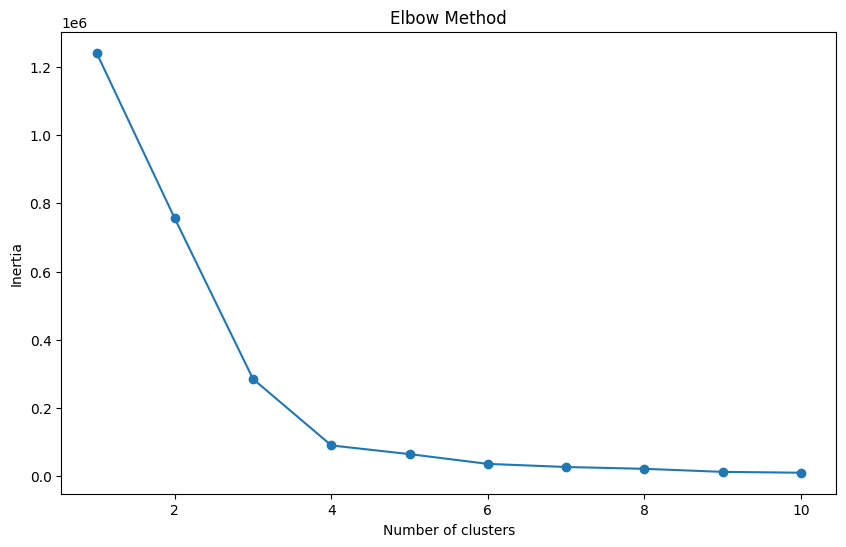

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [51]:
kmeans=KMeans(n_clusters=4,random_state=42)
kmeans.fit(pca_features)

KMeans(n_clusters=4, random_state=42)

In [52]:
cluster_labels = kmeans.labels_

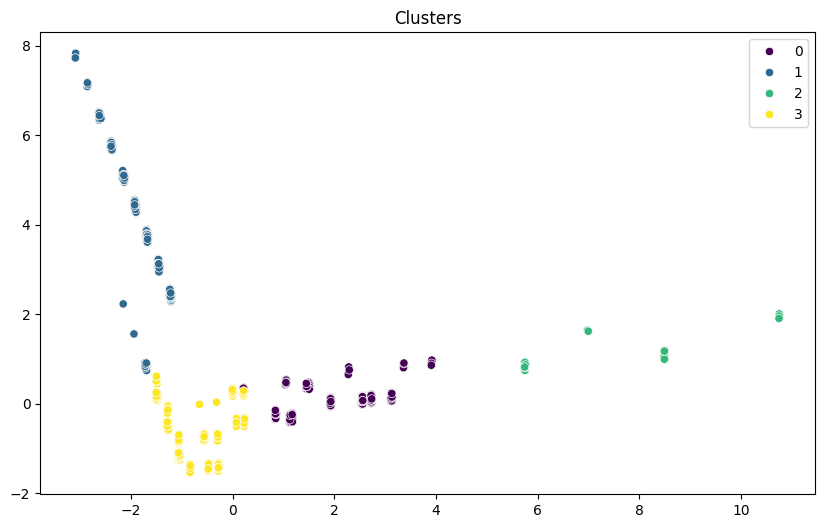

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=cluster_labels, palette='viridis')
plt.title('Clusters')
plt.show()
